In [20]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# full_grouped = pd.read_csv('COVID-19-complete-new.csv', parse_dates=['Date'])
full_grouped = pd.read_csv('COVID19_Aggregated_Data_Oct13.csv', parse_dates=['Date'])
canada = full_grouped[full_grouped['Country/Region'] == 'Canada']

In [3]:
canada.head()

Unnamed: 0 Country/Region       Date  Confirmed  Deaths  Recovered  \
32           32         Canada 2020-01-22          0     0.0        0.0   
219         219         Canada 2020-01-23          0     0.0        0.0   
406         406         Canada 2020-01-24          0     0.0        0.0   
593         593         Canada 2020-01-25          0     0.0        0.0   
780         780         Canada 2020-01-26          1     0.0        0.0   

     Active  New cases  New deaths  New recovered  
32      0.0          0           0              0  
219     0.0          0           0              0  
406     0.0          0           0              0  
593     0.0          0           0              0  
780     1.0          1           0              0

In [4]:
base = alt.Chart(canada).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)

In [5]:
red = alt.value("#f54242")
base.encode(y="Confirmed").properties(title='Total Confirmed') | base.encode(y="Deaths", color=red).properties(title='Total Deaths')

alt.HConcatChart(...)

In [6]:
green = alt.value("#338f5d")
base.encode(y="Recovered", color=green).properties(title='Total Recovered')

alt.Chart(...)

## Canada vs Global Trend

In [7]:
countries = ['US', 'India','Canada', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran', 'United Kingdom', 'Switzerland']
selected_countries = full_grouped[full_grouped['Country/Region'].isin(countries)]

In [8]:
alt.Chart(selected_countries).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color='Country/Region',
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=800,
    height=300
)

alt.Chart(...)

In [9]:
fig = px.line(full_grouped, x="Date", y="New cases", title='Daily New Cases Around the World', color='Country/Region')
fig.show()

## Canada Covid-19 Trend (Daily and Aggregated Trends)

In [10]:
fig = px.line(canada, x="Date", y="New cases", title='Daily New Cases in Canada', color='Country/Region')
fig.show()

In [11]:
fig = px.line(canada, x="Date", y="New deaths", title='Daily New Deaths in Canada', color='Country/Region')
fig.show()

In [12]:
fig = px.line(canada, x="Date", y="New recovered", title='Daily New Deaths in Canada', color='Country/Region')
fig.show()

The highest recovery peak we can see was on 17th July, reporting total 23.8K recovered cases. 

In [13]:
fig = px.line(canada, x="Date", y="Confirmed", title='Total Confirmed Cases in Canada')
fig.show()

In [14]:
fig = px.line(canada, x="Date", y="Recovered", title='Total Recovered Cases in Canada')
fig.show()

In [15]:
fig = px.line(canada, x="Date", y="Deaths", title='Total Deaths in Canada')
fig.show()

In [16]:
fig = px.line(canada, x="Date", y="Active", title='Total Active Cases in Canada')
fig.show()

## Canada Covid-19 cases in Weekdays vs. Weekends¶

In [17]:
canada['day'] = canada['Date'].apply(lambda x: x.day)
canada['month'] = canada['Date'].apply(lambda x: x.month)
canada["weekday"]= canada.apply(lambda row: row["Date"].weekday(),axis=1)
canada["weekday"] = (canada["weekday"] < 5).astype(int)

<ipython-input-17-6c551c3ddfc4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-6c551c3ddfc4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-6c551c3ddfc4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-6c551c3

In [18]:
canada

Unnamed: 0 Country/Region       Date  Confirmed  Deaths  Recovered  \
32             32         Canada 2020-01-22          0     0.0        0.0   
219           219         Canada 2020-01-23          0     0.0        0.0   
406           406         Canada 2020-01-24          0     0.0        0.0   
593           593         Canada 2020-01-25          0     0.0        0.0   
780           780         Canada 2020-01-26          1     0.0        0.0   
...           ...            ...        ...        ...     ...        ...   
48652       48652         Canada 2020-10-08     177717  9543.0   149692.0   
48839       48839         Canada 2020-10-09     180612  9572.0   152046.0   
49026       49026         Canada 2020-10-10     182754  9595.0   153857.0   
49213       49213         Canada 2020-10-11     184390  9600.0   155901.0   
49400       49400         Canada 2020-10-12     185365  9614.0   156940.0   

        Active  New cases  New deaths  New recovered  day  month  weekday  
32         0.0          0           0              0   22      1        1  
219        0.0          0           0              0   23      1        1  
406        0.0          0           0              0   24      1        1  
593        0.0          0           0              0   25      1        0  
780        1.0          1           0              0   26      1        0  
...        ...        ...         ...            ...  ...    ...      ...  
48652  18482.0       2350          16           1878    8     10        1  
48839  18994.0       2895          29           2354    9     10        1  
49026  19302.0       2142          23           1811   10     10        0  
49213  18889.0       1636           5           2044   11     10        0  
49400  18811.0        975          14           1039   12     10        1  

[265 rows x 13 columns]

<ipython-input-23-ddff66c5675d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

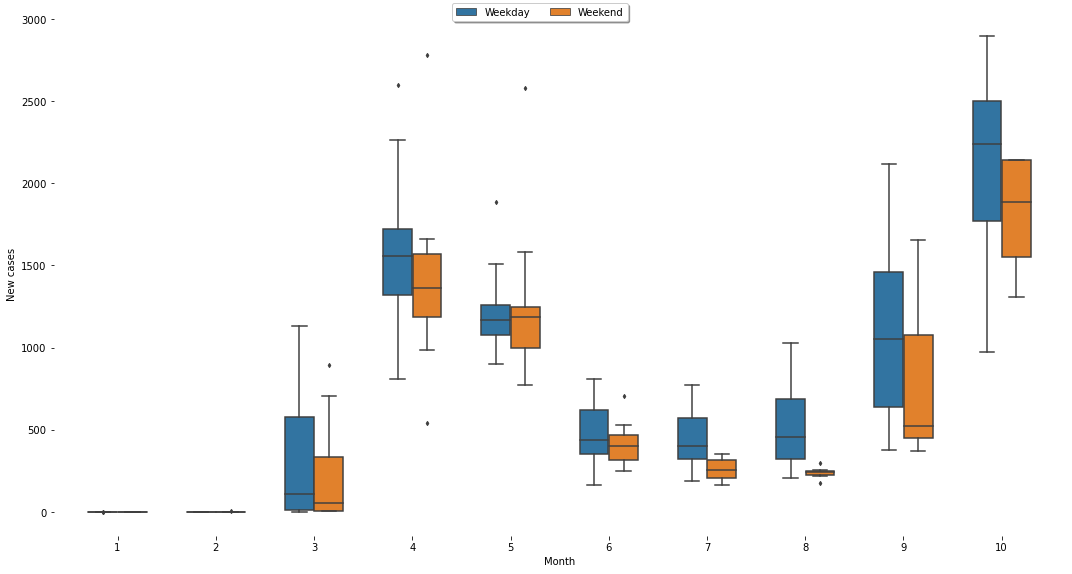

In [23]:
# plt.figure(figure(15,20))
day_dict={0:'Weekend',1:'Weekday'}
canada['Day'] = canada.weekday.map(day_dict)

a=plt.figure(figsize=(15,8)) 
plt1=sns.boxplot('month','New cases',hue='Day',width=0.6,fliersize=3,
                    data=canada)                                                                                                                                                                                                                                                                                                                                                 
a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True) 
plt.xlabel('Month')
plt.tight_layout()                                                                                                                  
plt.legend().set_visible(False);
plt.plot(figsize=(16,10))

Weekdays have more number of cases than weekends

/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



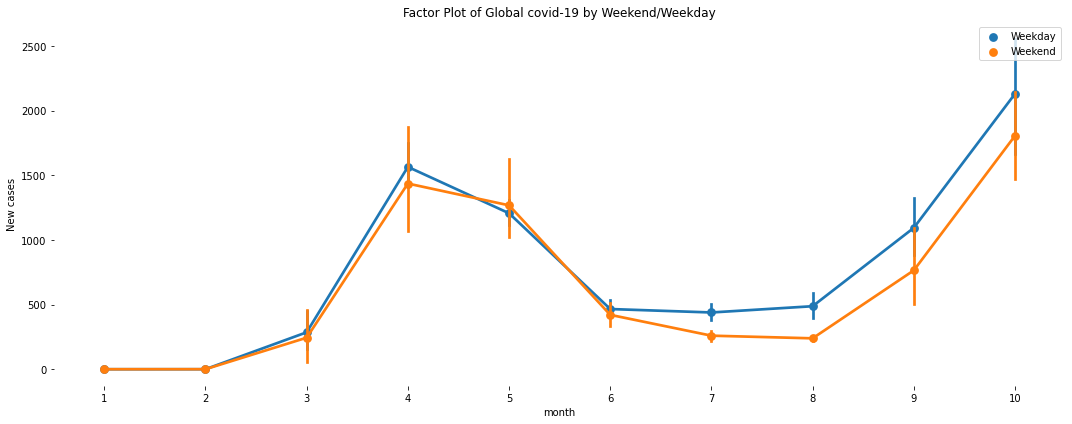

In [24]:
plt1=sns.factorplot('month','New cases',hue='Day',
                    data=canada, size=6, aspect=2.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
plt.title('Factor Plot of Global covid-19 by Weekend/Weekday')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper right');